# Estadistica Aplicada
Seccion 7 - 07 septiembre 2023

Francisco Humberto Villegas Reyna 1731722 Gpo43

In [1]:
## librerias basicas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## librerias especializadas
!pip install lifelines

     ---------------------------------------- 0.0/409.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/409.4 kB ? eta -:--:--
     - -------------------------------------- 10.2/409.4 kB ? eta -:--:--
     - -------------------------------------- 10.2/409.4 kB ? eta -:--:--
     -- ---------------------------------- 30.7/409.4 kB 186.2 kB/s eta 0:00:03
     -- ---------------------------------- 30.7/409.4 kB 186.2 kB/s eta 0:00:03
     -- ---------------------------------- 30.7/409.4 kB 186.2 kB/s eta 0:00:03
     -- ---------------------------------- 30.7/409.4 kB 186.2 kB/s eta 0:00:03
     -- ---------------------------------- 30.7/409.4 kB 186.2 kB/s eta 0:00:03
     -- ---------------------------------- 30.7/409.4 kB 186.2 kB/s eta 0:00:03
     -- ---------------------------------- 30.7/409.4 kB 186.2 kB/s eta 0:00:03
     -- ---------------------------------- 30.7/409.4 kB 186.2 kB/s eta 0:00:03
     -- ---------------------------------- 30.7/409.4 kB 186.2 kB/

In [3]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [4]:
## importar los datos 
recaida=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [5]:
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [6]:
# estimar el modelo exponencial
expon=ExponentialFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [7]:
## a)riesgo

expon.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


In [8]:
## b) supervivencia t=16
expon.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

In [9]:
## acceder a la funcion de supervivencia(todos los valores)

expon.survival_function_

,Exponential_estimate
5.0,0.846482
8.0,0.765928
11.0,0.693041
14.0,0.627089
17.0,0.567414
20.0,0.513417
23.0,0.464559
26.0,0.420350
29.0,0.380349
32.0,0.344154


Text(0, 0.5, '$S(t)$')

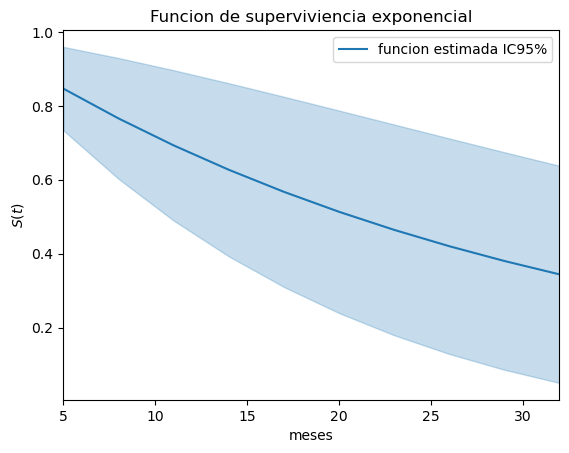

In [21]:
#grafica de S(t)
expon.plot_survival_function(label='funcion estimada IC95%')
plt.title('Funcion de superviviencia exponencial')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$S(t)$')

Text(0, 0.5, '$h(t)$')

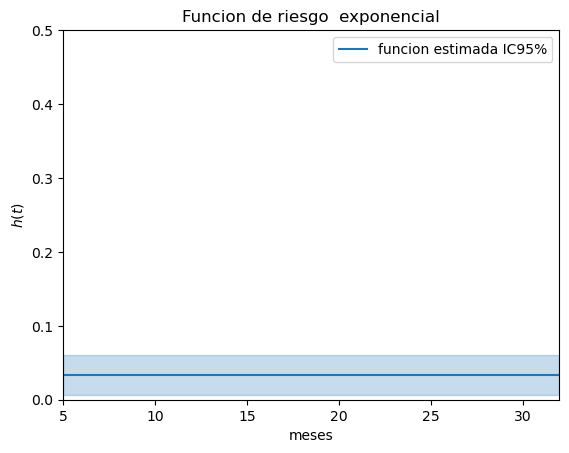

In [20]:
#grafica de h(t)
expon.plot_hazard(label='funcion estimada IC95%')
plt.title('Funcion de riesgo  exponencial')
plt.xlim(5,32)
plt.ylim(0,0.5)
plt.xlabel('meses')
plt.ylabel('$h(t)$')

Text(0, 0.5, '$f(t)$')

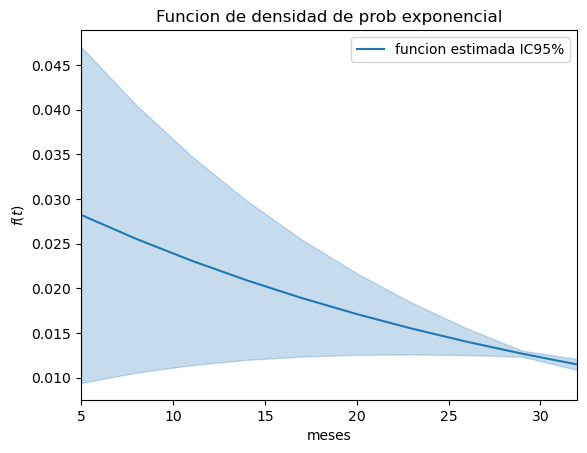

In [19]:
#grafica f(t)
expon.plot_density(label='funcion estimada IC95%')
plt.title('Funcion de densidad de prob exponencial')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$f(t)$')

**WEIBUKK**
vamos a suponer que el tiempo de recaida se dsitriuye Weibull

In [22]:
#modelo weibull
mweibull=WeibullFitter().fit(recaida[' tiempo'],recaida[' estado'])

In [24]:
## valor de gamma
mweibull.rho_.round(2)

1.89

Text(0, 0.5, '$h(t)$')

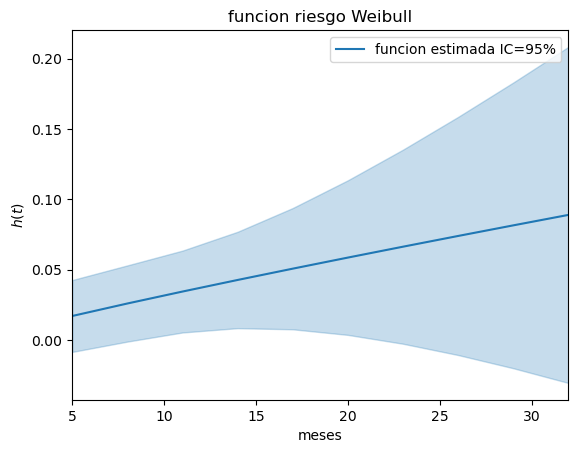

In [25]:
mweibull.plot_hazard(label='funcion estimada IC=95%')
plt.title('funcion riesgo Weibull')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$h(t)$')

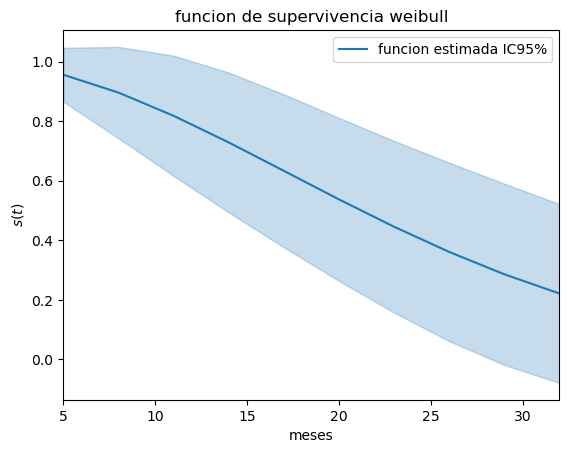

In [27]:
## 
mweibull.plot_survival_function(label='funcion estimada IC95%')
plt.title('funcion de supervivencia weibull')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$s(t)$');

Text(0, 0.5, '$f(t)$')

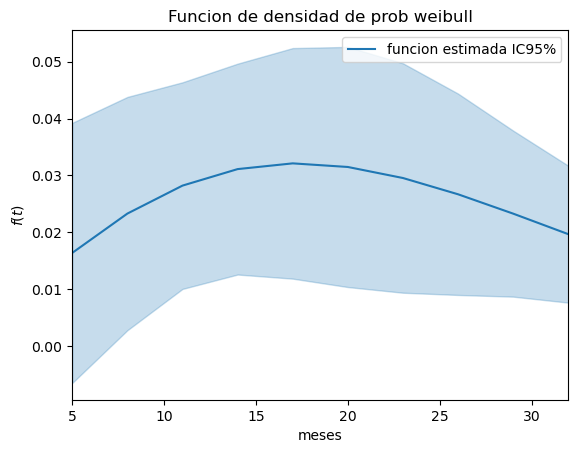

In [28]:
#grafica f(t)
mweibull.plot_density(label='funcion estimada IC95%')
plt.title('Funcion de densidad de prob weibull')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$f(t)$')

**lognormal**

vamos a suponer que el tiempo de racaida se distribuye lognormal

In [30]:
mlog=LogNormalFitter().fit(recaida[' tiempo'], recaida[' estado'])

(5.0, 32.0)

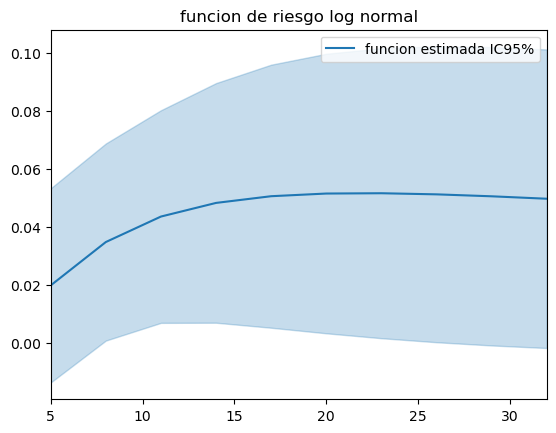

In [35]:
## funcion de riesgo
mlog.plot_hazard(label='funcion estimada IC95%');
plt.title('funcion de riesgo log normal')
plt.xlim(5,32)

In [33]:
mlog.hazard_


,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


el riesgo es creciente del tiempo 5 al 23 , y es decreciente del 23 al 32

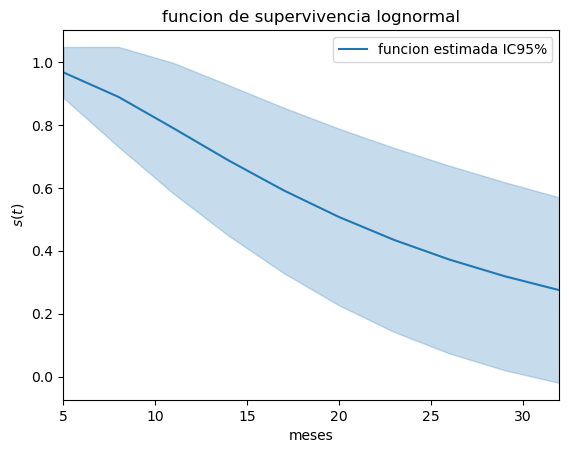

In [36]:
## 
mlog.plot_survival_function(label='funcion estimada IC95%')
plt.title('funcion de supervivencia lognormal')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$s(t)$');

Text(0, 0.5, '$f(t)$')

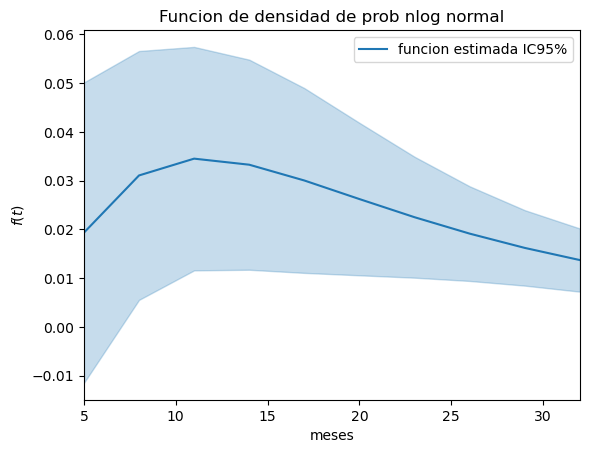

In [37]:
#grafica f(t)
mlog.plot_density(label='funcion estimada IC95%')
plt.title('Funcion de densidad de prob nlog normal')
plt.xlim(5,32)
plt.xlabel('meses')
plt.ylabel('$f(t)$')

cual de los 3 modelos se ajusta mejor (describe) a los datos:
1. Exponencial
2. Weibull
3. LogNormal

criterio Akaike(AIC)=$-2Ln(fn Verosimilitud + 2k)$

k =parametros del modelo

De acuerdo con el AIC el "mejor" modelo es el que tiene menor valor de AIC.De acuerod con el criterio de akaike son "mejores" los modelos mas simples. 

In [40]:
expon.AIC_.round(2)

54.81

In [42]:
mweibull.AIC_.round(2)

54.16

In [43]:
mlog.AIC_.round(2)

54.51

In [46]:
print('Exponencial:',expon.AIC_.round(2),',','\nWeibull:',mweibull.AIC_.round(2),',','\nLogNormal:',mlog.AIC_.round(2))

Exponencial: 54.81 , 
Weibull: 54.16 , 
LogNormal: 54.51


De acuerdo a AIC el mejor modelo es el Weibull. Lo que significa que el riesgo de la recaida es creciente.